In [30]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
PIP= pd.read_excel("Steel-express.xlsx","PIPES")

In [32]:
PIP

,Date,Weeks,type,purchases(kg),sales(kg),stock,price for sales(EGP),price for purchases(EGP),Total Sales(EGP),Total Purchases(EGP),Average price,Average price for sales
0,2023-01-01,1,PIPES,7618,0,7618,0.0,41.3,0.0,314623.4,42.300000,46.545387
1,2023-01-01,1,PIPES,5565,0,13183,0.0,40.8,0.0,227052.0,41.088933,46.589711
2,2023-01-01,1,PIPES,38561,0,51744,0.0,42.5,0.0,1638842.5,42.140497,46.591515
3,2023-01-01,1,PIPES,12050,0,63794,0.0,41.3,0.0,497665.0,41.981737,46.590389
4,2023-01-01,1,PIPES,144422,0,208216,0.0,40.0,0.0,5776880.0,40.607172,46.589415
...,...,...,...,...,...,...,...,...,...,...,...,...
770,2023-12-18,51,PIPES,0,288,48932,50.0,0.0,14400.0,0.0,42.060634,47.822963
771,2023-12-18,51,PIPES,0,2901,46031,50.9,0.0,147660.9,0.0,42.060636,47.830296
772,2023-12-18,51,PIPES,0,202,45829,50.2,0.0,10140.4,0.0,42.060636,47.830740
773,2023-12-18,51,PIPES,0,757,45072,50.1,0.0,37925.7,0.0,42.060635,47.832371


In [33]:
PIP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      775 non-null    datetime64[ns]
 1   Weeks                     775 non-null    int64         
 2   type                      775 non-null    object        
 3   purchases(kg)             775 non-null    int64         
 4   sales(kg)                 775 non-null    int64         
 5   stock                     775 non-null    int64         
 6   price for sales(EGP)      775 non-null    float64       
 7   price for purchases(EGP)  775 non-null    float64       
 8   Total Sales(EGP)          775 non-null    float64       
 9   Total Purchases(EGP)      775 non-null    float64       
 10  Average price             775 non-null    float64       
 11  Average price for sales   775 non-null    float64       
dtypes: datetime64[ns](1), 

In [34]:
PIP.isnull().sum()

Date                        0
Weeks                       0
type                        0
purchases(kg)               0
sales(kg)                   0
stock                       0
price for sales(EGP)        0
price for purchases(EGP)    0
Total Sales(EGP)            0
Total Purchases(EGP)        0
Average price               0
Average price for sales     0
dtype: int64

In [35]:
## Filling Mising DATA WITH 0

PIP['price for sales(EGP)'].fillna(0,inplace=True)

PIP['price for purchases(EGP)'].fillna(0,inplace=True)


## EDA

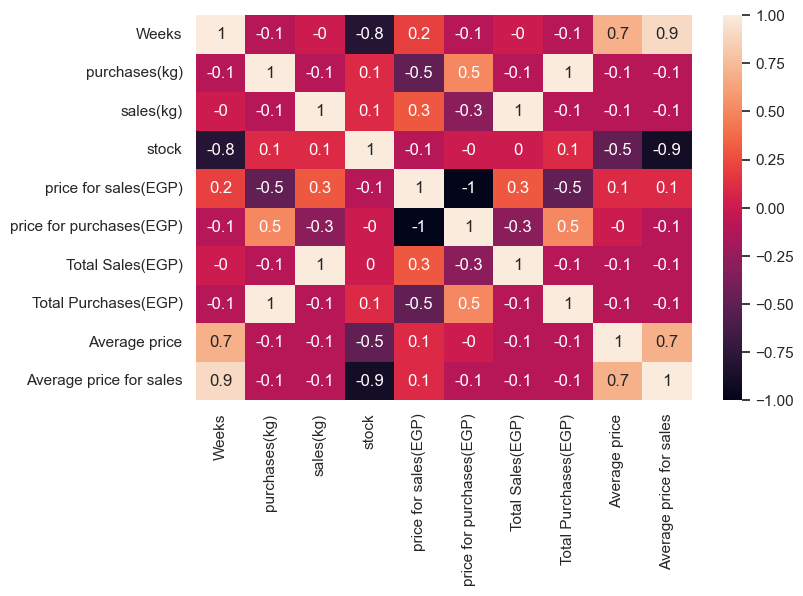

In [36]:
## correlation_matrix to see the correlation between columns
correlation_matrix = PIP.corr().round(1)
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(data=correlation_matrix, annot=True);

## Data Visualization"

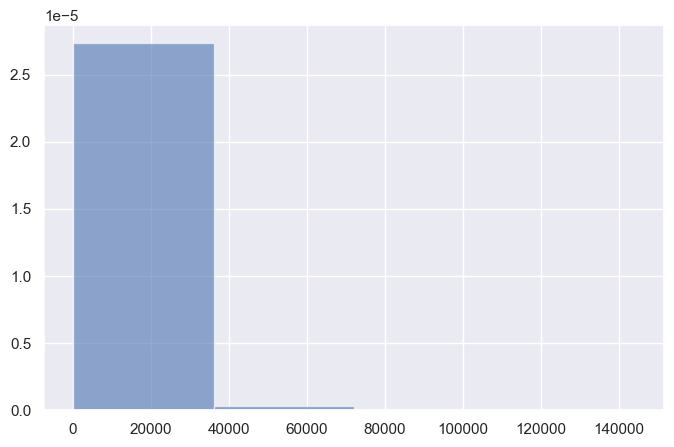

In [37]:

PIP_PUR = PIP['purchases(kg)']  

plt.hist(PIP_PUR, bins=4, density=True, alpha=0.6, color='b')

plt.show()


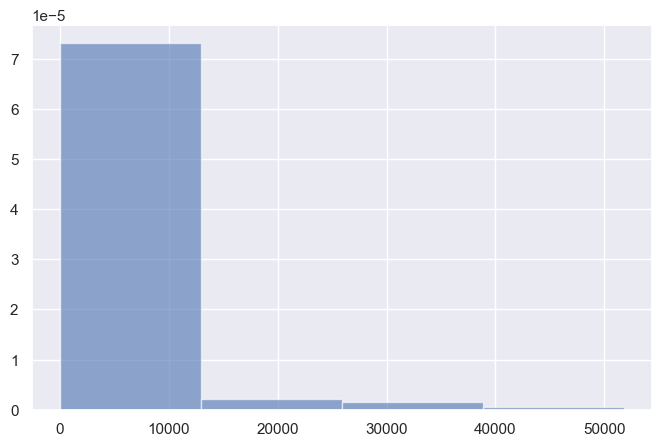

In [38]:

PIP_SALES = PIP['sales(kg)']  


plt.hist(PIP_SALES, bins=4, density=True, alpha=0.6, color='b')

plt.show()


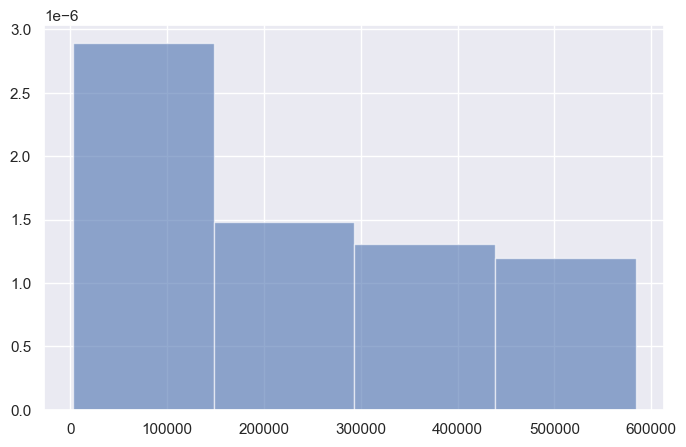

In [40]:

PIP_stock = PIP['stock']  
plt.hist(PIP_stock, bins=4, density=True, alpha=0.6, color='b')

plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\1628406726.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())


<AxesSubplot:xlabel='type'>

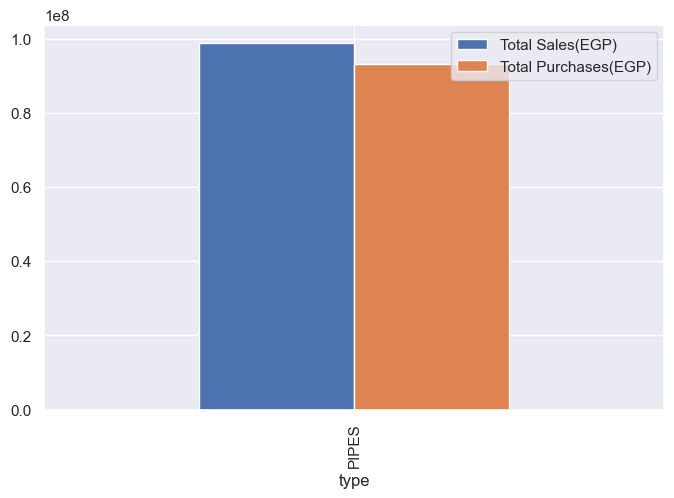

In [41]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(PIP.groupby('type')['Total Sales(EGP)','Total Purchases(EGP)'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\1858103713.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP.groupby('type')['Average price','Average price for sales'].mean())


<AxesSubplot:xlabel='type'>

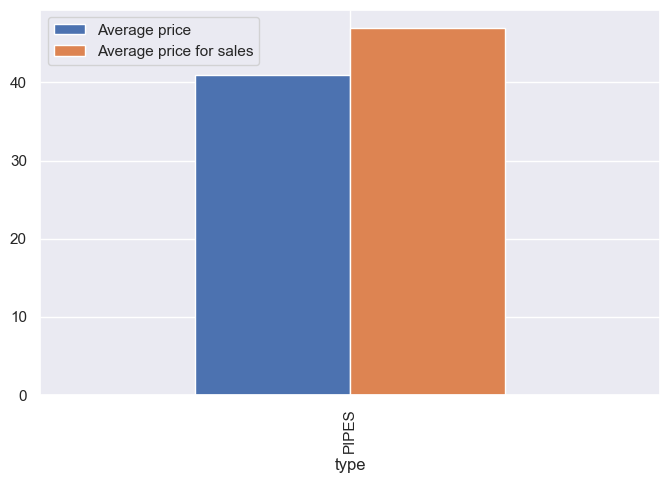

In [42]:
sum_by_type = round(PIP.groupby('type')['Average price','Average price for sales'].mean())
sum_by_type.plot(kind="bar")

## Sales_over_Time

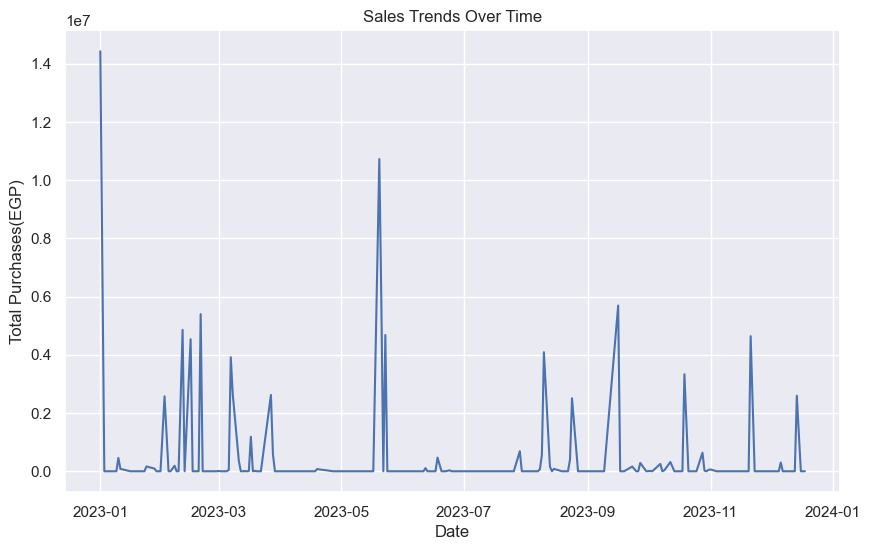

In [43]:
#the best season comes at qtr3 of each year the most selling part of the year 

PIP['Date'] = pd.to_datetime(PIP['Date'])

sales_by_date = PIP.groupby('Date')['Total Purchases(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Purchases(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchases(EGP)')
plt.grid(True)
plt.show()

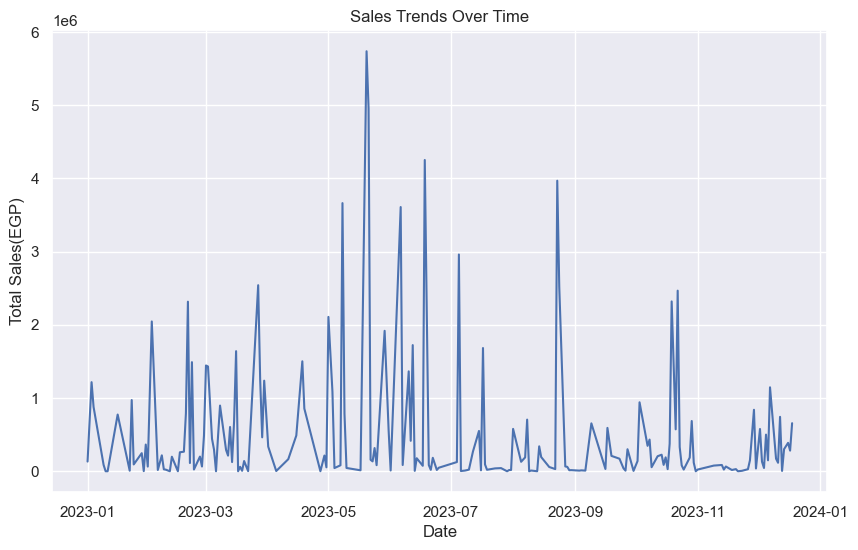

In [44]:
#the best season comes at qtr3 of each year the most selling part of the year 

PIP['Date'] = pd.to_datetime(PIP['Date'])

sales_by_date = PIP.groupby('Date')['Total Sales(EGP)'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Sales(EGP)'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales(EGP)')
plt.grid(True)
plt.show()

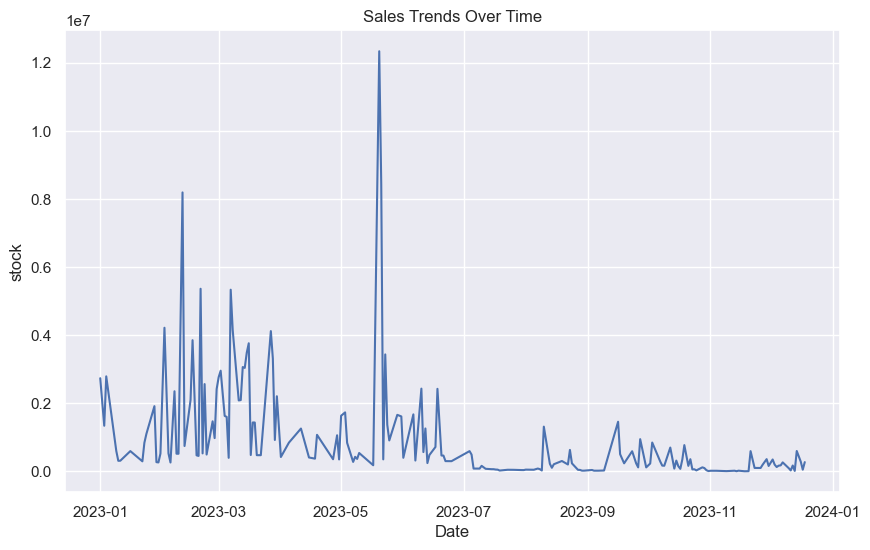

In [45]:
#the best season comes at qtr3 of each year the most selling part of the year 

PIP['Date'] = pd.to_datetime(PIP['Date'])

sales_by_date = PIP.groupby('Date')['stock'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['stock'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('stock')
plt.grid(True)
plt.show()

In [46]:
PIP_PV= pd.read_excel("ST-EXPRSS-PV.xlsx","PIPES")

In [47]:
PIP_PV.head(7)

,purchases(kg),sales(kg),Stock,Holding,Order_Cost(EGP),New_Purchase,New_Stock,NEW_HOLDING,NEW_ORDER_COST,type,Week
0,351344,50332,301012,105403.2,1015407,95205.951813,44873.951813,28561.785544,275151,PIPES,1
1,12960,1921,312051,94191.6,37455,0.000000,42952.951813,13462.185544,0,PIPES,2
2,0,17174,294877,93615.3,0,0.000000,25778.951813,12885.885544,0,PIPES,3
3,6064,30447,270494,90282.3,17525,95205.951813,90537.903626,36295.471088,275151,PIPES,4
4,61818,71657,260655,99693.6,178658,0.000000,18880.903626,27161.371088,0,PIPES,5
5,121738,6453,375940,114717.9,351831,0.000000,12427.903626,5664.271088,0,PIPES,6
6,111640,16374,471206,146274.0,322647,95205.951813,91259.855438,32290.156632,275151,PIPES,7


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\3790076773.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())


<AxesSubplot:xlabel='type'>

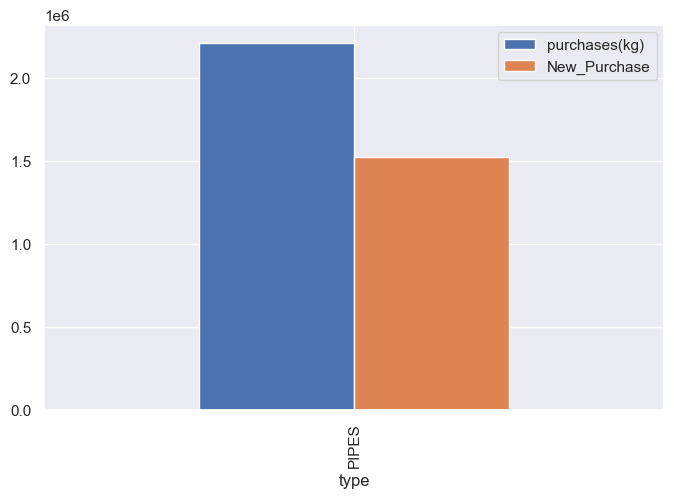

In [48]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(PIP_PV.groupby('type')['purchases(kg)','New_Purchase'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\2982615617.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())


<AxesSubplot:xlabel='type'>

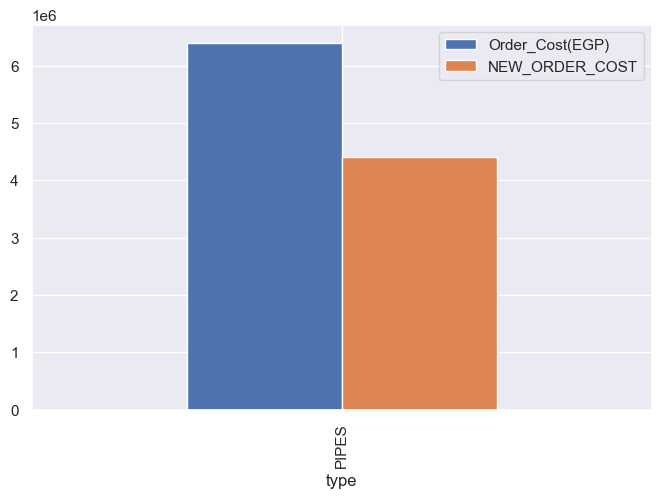

In [49]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(PIP_PV.groupby('type')['Order_Cost(EGP)','NEW_ORDER_COST'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\2411790820.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Holding','NEW_HOLDING'].sum())


<AxesSubplot:xlabel='type'>

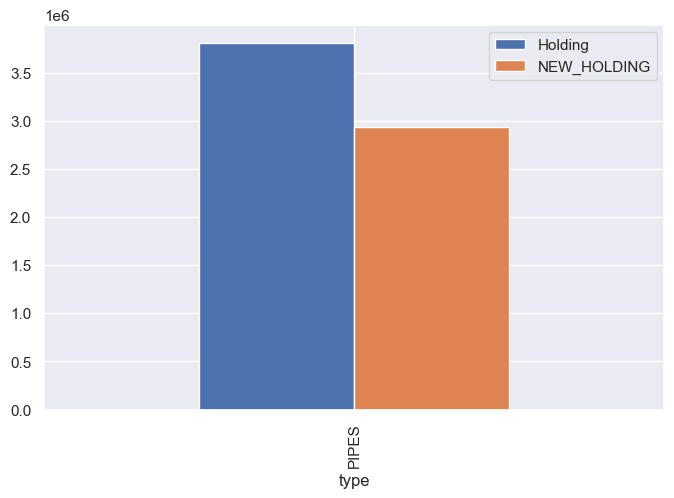

In [50]:
# Group by 'type' and calculate the sum of sales  within each group
sum_by_type = round(PIP_PV.groupby('type')['Holding','NEW_HOLDING'].sum())
sum_by_type.plot(kind="bar")

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\4174711715.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_by_type = round(SFP_PV.groupby('type')['Stock','New_Stock'].sum())


<AxesSubplot:xlabel='type'>

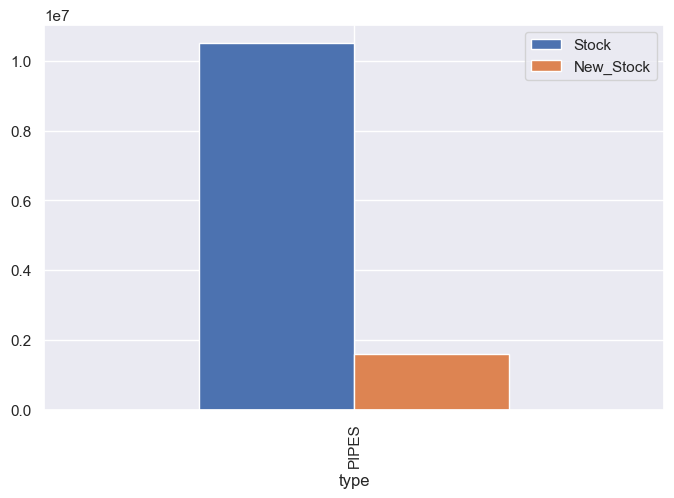

In [51]:
sum_by_type = round(PIP_PV.groupby('type')['Stock','New_Stock'].sum())
sum_by_type.plot(kind="bar")

## Time_series

In [52]:
PIP_PV.columns

Index(['purchases(kg)', 'sales(kg)', 'Stock', 'Holding', 'Order_Cost(EGP)',
       'New_Purchase', 'New_Stock', 'NEW_HOLDING', 'NEW_ORDER_COST', 'type',
       'Week'],
      dtype='object')

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\1721446271.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()


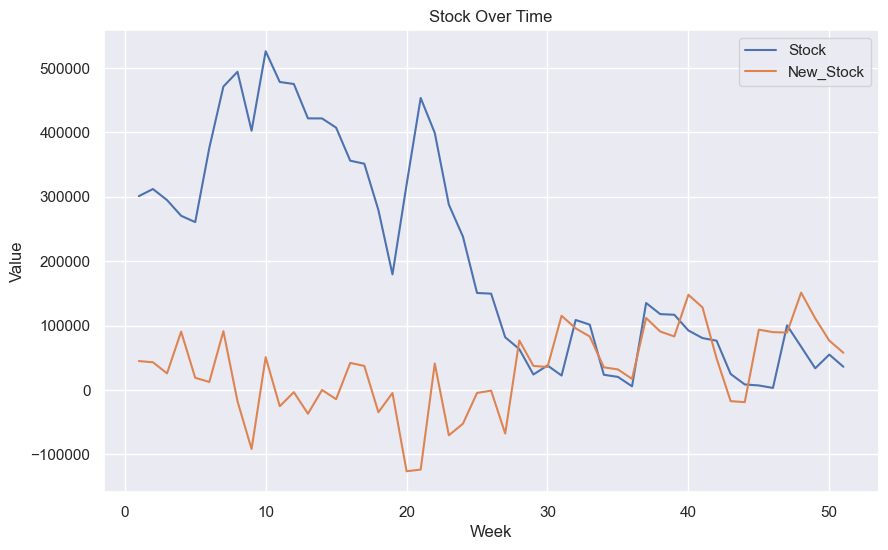

In [53]:
# Group by week and calculate the sum of each column
sales_by_week = PIP_PV.groupby('Week')['Stock', 'New_Stock'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Stock Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
PIP_PV.columns

Index(['purchases(kg)', 'sales(kg)', 'Stock', 'Holding', 'Order_Cost(EGP)',
       'New_Purchase', 'New_Stock', 'NEW_HOLDING', 'NEW_ORDER_COST', 'type',
       'Week'],
      dtype='object')

C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\3857867267.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()


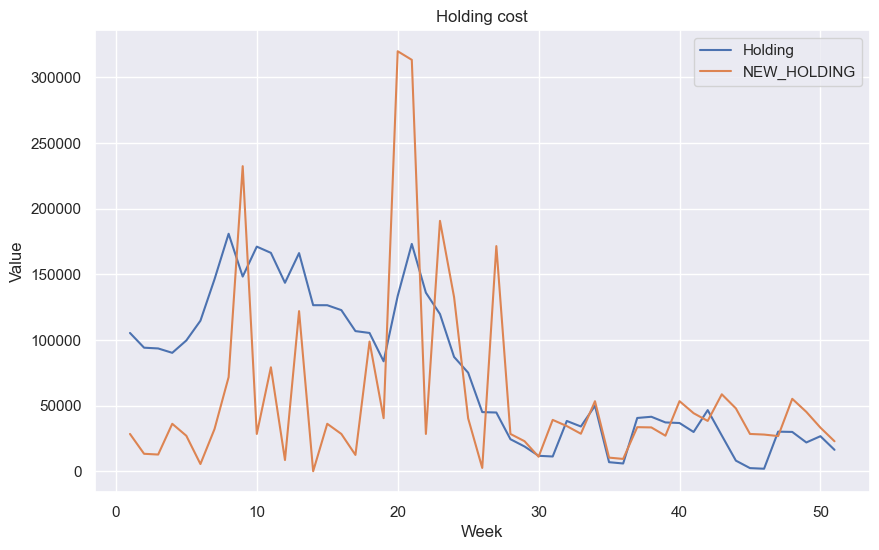

In [55]:
# Group by week and calculate the sum of each column
sales_by_week = PIP_PV.groupby('Week')['Holding', 'NEW_HOLDING'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Holding cost')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\3223507452.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()


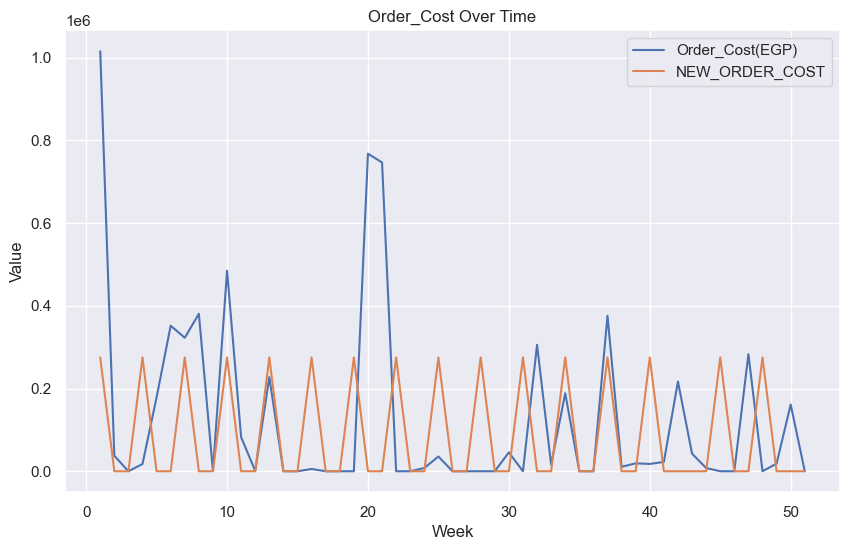

In [56]:
# Group by week and calculate the sum of each column
sales_by_week = PIP_PV.groupby('Week')['Order_Cost(EGP)', 'NEW_ORDER_COST'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Order_Cost Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Yousssef Emad\AppData\Local\Temp\ipykernel_14964\2493272346.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_week = SFP_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()


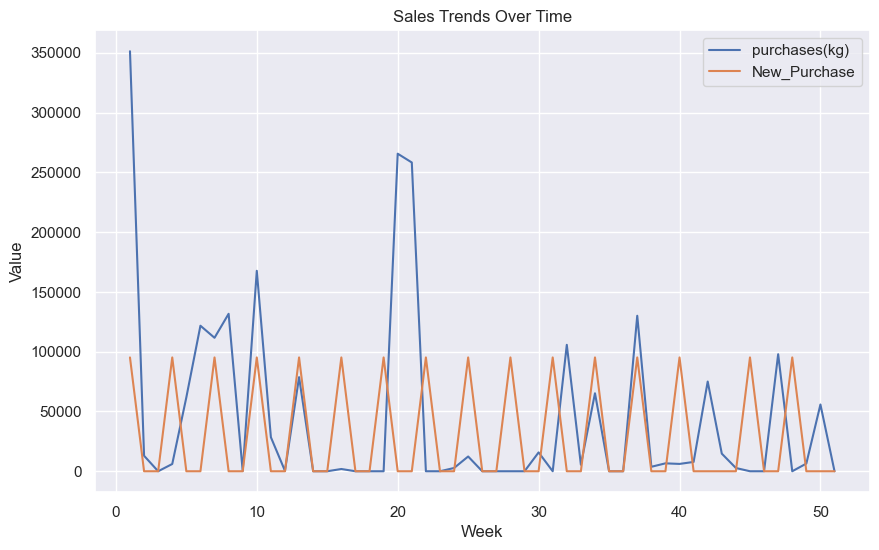

In [57]:
# Group by week and calculate the sum of each column
sales_by_week = PIP_PV.groupby('Week')['purchases(kg)', 'New_Purchase'].sum().reset_index()

# Columns you want to plot (excluding 'Week' column)
columns_to_plot = list(sales_by_week.columns)
columns_to_plot.remove('Week')

# Plot each column separately
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(sales_by_week['Week'], sales_by_week[column], label=column)

plt.title('Sales Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


## Box-plots 

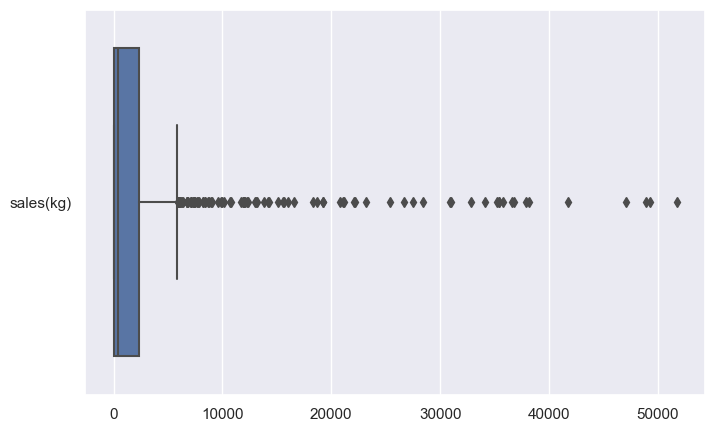

In [58]:
sns.boxplot(data=PIP[["sales(kg)"]], orient="h")
plt.show()

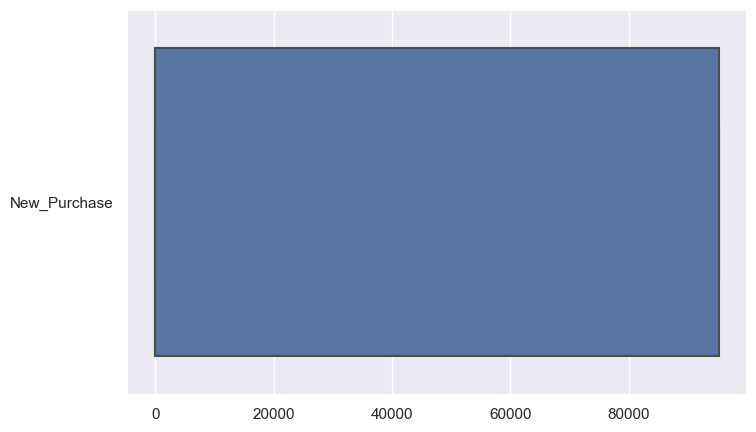

In [59]:
sns.boxplot(data=PIP_PV[["New_Purchase"]], orient="h")
plt.show()

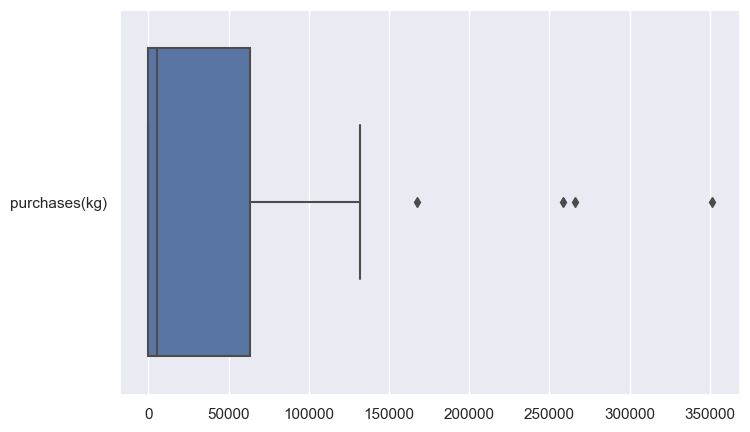

In [60]:
sns.boxplot(data=PIP_PV[["purchases(kg)"]], orient="h")
plt.show()

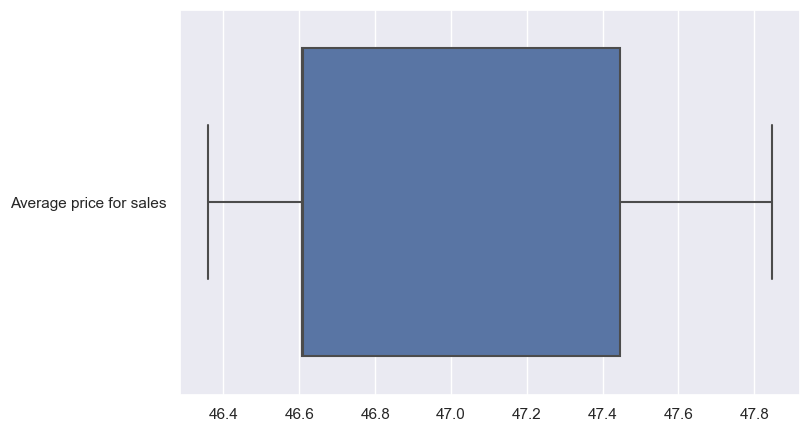

In [61]:
sns.boxplot(data=PIP[["Average price for sales"]], orient="h")
plt.show()